In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# demo
layer = tf.keras.layers.Dense(20, input_shape=[None, 5])
layer(tf.zeros([10, 5]))

<tf.Tensor: id=29, shape=(10, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [4]:
# w * x + b
layer.variables

[<tf.Variable 'dense/kernel:0' shape=(5, 20) dtype=float32, numpy=
 array([[ 0.3585687 , -0.44346425,  0.1774588 , -0.1057339 ,  0.37546846,
         -0.19779825,  0.287088  ,  0.41847005, -0.4820995 , -0.36129373,
         -0.01234433, -0.4379932 , -0.19239399,  0.2450436 ,  0.32249942,
          0.10080877,  0.323859  ,  0.34389803, -0.13670373,  0.34221074],
        [-0.40628645,  0.29484436, -0.14394188, -0.226834  ,  0.21517643,
         -0.2976942 , -0.21113399,  0.14547315, -0.4300157 , -0.03794178,
         -0.46689567,  0.02104339, -0.4026898 ,  0.28551528, -0.4679415 ,
          0.30340484, -0.12856027, -0.16545984, -0.10653201,  0.46556422],
        [ 0.17640516, -0.4644189 ,  0.2075887 ,  0.32145408, -0.3454238 ,
         -0.03733549, -0.46094477,  0.14808711,  0.13726053, -0.06632486,
         -0.10980299,  0.18003622,  0.4634998 ,  0.07442054,  0.21768674,
         -0.32792145, -0.00553718, -0.34284753, -0.48975578, -0.09280744],
        [-0.20218658, -0.4381845 ,  0.4578

In [5]:
layer.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(5, 20) dtype=float32, numpy=
 array([[ 0.3585687 , -0.44346425,  0.1774588 , -0.1057339 ,  0.37546846,
         -0.19779825,  0.287088  ,  0.41847005, -0.4820995 , -0.36129373,
         -0.01234433, -0.4379932 , -0.19239399,  0.2450436 ,  0.32249942,
          0.10080877,  0.323859  ,  0.34389803, -0.13670373,  0.34221074],
        [-0.40628645,  0.29484436, -0.14394188, -0.226834  ,  0.21517643,
         -0.2976942 , -0.21113399,  0.14547315, -0.4300157 , -0.03794178,
         -0.46689567,  0.02104339, -0.4026898 ,  0.28551528, -0.4679415 ,
          0.30340484, -0.12856027, -0.16545984, -0.10653201,  0.46556422],
        [ 0.17640516, -0.4644189 ,  0.2075887 ,  0.32145408, -0.3454238 ,
         -0.03733549, -0.46094477,  0.14808711,  0.13726053, -0.06632486,
         -0.10980299,  0.18003622,  0.4634998 ,  0.07442054,  0.21768674,
         -0.32792145, -0.00553718, -0.34284753, -0.48975578, -0.09280744],
        [-0.20218658, -0.4381845 ,  0.4578

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11)

In [7]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [8]:
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [16]:
# use lambda to implement customized layer which has no para
# tf.nn.softplus: log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))

In [17]:
# customized dense layer
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        """build parameters we need"""
        # x * w + b
        # input_shape: [None, a], w: [a, b], output_shape: [None, b]
        self.kernel = self.add_weight(name='kernel',
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.bias = self.add_weight(name='bias',
                                    shape=(self.units,),
                                    initializer='zeros',
                                    trainable=True)
        super(CustomizedDenseLayer, self).build(input_shape)

    def call(self, x):
        """Complete forward computation"""
        return self.activation(x @ self.kernel + self.bias)


model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus
    # keras.layers.Dense(1, activation='softplus')
    # keras.layers.Dense(1), keras.layers.Activation('softplus')
])
model.compile(loss=customized_mse, optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]

In [18]:
history = model.fit(x_train_scaled, y_train,
                    validation_data=(x_valid_scaled, y_valid),
                    epochs=100,
                    callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 72us/sample - loss: 1.1998 - val_loss: 0.6751
Epoch 2/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5850 - val_loss: 0.5855
Epoch 3/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5136 - val_loss: 0.5168
Epoch 4/100
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4712 - val_loss: 0.4821
Epoch 5/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4516 - val_loss: 0.4596
Epoch 6/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4425 - val_loss: 0.4542
Epoch 7/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4306 - val_loss: 0.4568
Epoch 8/100
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4197 - val_loss: 0.4331
Epoch 9/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.410

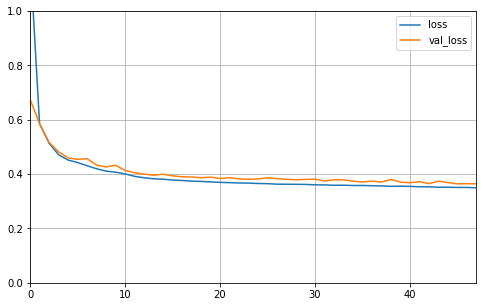

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


plot_learning_curves(history)

In [15]:
model.evaluate(x_test_scaled, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.3939049924066825